In [ ]:
import pandas as pd
import numpy as np
from ultralytics import YOLO
import torch

import shutil
import os

import random

from PIL import Image
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


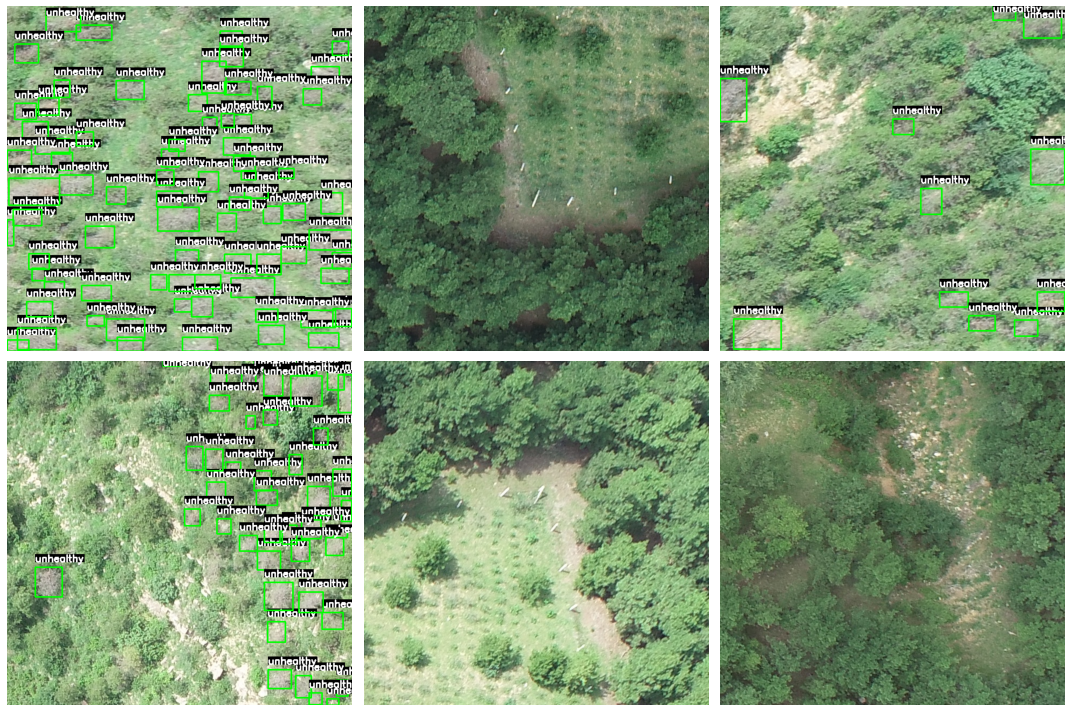

In [2]:
import yaml
random.seed(42)

# Папки с изображениями и метками
images_folder = "/home/user/CourseWork/datasets/Pests_and_Diseases_Tree/PDT dataset/PDT dataset/LL/YOLO_txt/train/images"
labels_folder = "/home/user/CourseWork/datasets/Pests_and_Diseases_Tree/PDT dataset/PDT dataset/LL/YOLO_txt/train/labels"

# Загрузка списка файлов изображений
image_files = os.listdir(images_folder)

# Выбор случайных изображений
random.shuffle(image_files)
random_image_files = image_files[:6]

# Отображение случайных изображений с метками
num_images = len(random_image_files)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()


with open("data.yaml", "r") as f:
    data = yaml.safe_load(f)
classes = data["names"]  # Список классов

for i in range(num_images):
    # Загрузка изображения
    image_file = os.path.join(images_folder, random_image_files[i])
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Загрузка меток из файла
    label_file = os.path.join(labels_folder, os.path.splitext(random_image_files[i])[0] + ".txt")
    if not os.path.exists(label_file):
        continue
    with open(label_file, "r") as file:
        labels = file.readlines()

    # Отображение изображения с метками
    h, w, _ = image.shape
    for label in labels:
        class_id, x_center, y_center, box_width, box_height = map(float, label.strip().split())

        # Перевод YOLO координат в координаты прямоугольника
        x1 = int((x_center - box_width / 2) * w)
        y1 = int((y_center - box_height / 2) * h)
        x2 = int((x_center + box_width / 2) * w)
        y2 = int((y_center + box_height / 2) * h)

        # Настройка уменьшенной толщины и текста
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Толщина = 1
        class_name = classes[int(class_id)] if int(class_id) < len(classes) else f"Class {int(class_id)}"

        font_scale = 0.6
        thickness = 2
        text_size = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, font_scale, thickness)[0]
        text_x = x1
        text_y = y1 - 10 if y1 - 10 > 10 else y1 + 10

        # Фон под текстом (для четкости)
        cv2.rectangle(image, (text_x, text_y - text_size[1]), (text_x + text_size[0], text_y), (0, 0, 0), -1)
        cv2.putText(image, class_name, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 255, 255), thickness)

    # Отображение изображения
    axes[i].imshow(image)
    axes[i].axis("off")

plt.tight_layout()
plt.show()

In [3]:
model = YOLO("yolov9m.pt")

100%|██████████| 39.1M/39.1M [00:02<00:00, 20.4MB/s]


In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [5]:
model.train(data='data.yaml ', epochs=50, imgsz=640,
            optimizer = 'AdamW', lr0 = 1e-3, 
            project = 'YOLO9m', name='Medium_try',
            batch=32, device=device, seed=69)

New https://pypi.org/project/ultralytics/8.3.64 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.63 🚀 Python-3.10.12 torch-2.3.1 CUDA:0 (NVIDIA GeForce RTX 3090, 24252MiB)
engine/trainer: task=detect, mode=train, model=yolov9m.pt, data=data.yaml , epochs=50, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=YOLO9m, name=Medium_try, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=69, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frame

train: Scanning /home/user/CourseWork/datasets/Pests_and_Diseases_Tree/PDT dataset/PDT dataset/LL/YOLO_txt/train/labels.cache... 4536 images, 1330 backgrounds, 0 corrupt: 100%|██████████| 4536/4536 [00:00<?, ?it/s]
val: Scanning /home/user/CourseWork/datasets/Pests_and_Diseases_Tree/PDT dataset/PDT dataset/LL/YOLO_txt/val/labels.cache... 567 images, 168 backgrounds, 0 corrupt: 100%|██████████| 567/567 [00:00<?, ?it/s]


Plotting labels to YOLO9m/Medium_try/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 149 weight(decay=0.0), 156 weight(decay=0.0005), 155 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to YOLO9m/Medium_try
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      17.8G      1.527      1.192      1.208        640        640: 100%|██████████| 142/142 [01:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.33it/s]

                   all        567      12655      0.792      0.748       0.84      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      22.2G      1.282       0.82      1.084        451        640: 100%|██████████| 142/142 [01:00<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.37it/s]

                   all        567      12655      0.738      0.732      0.802      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      20.5G       1.24     0.7779       1.07        502        640: 100%|██████████| 142/142 [00:59<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.36it/s]

                   all        567      12655      0.831      0.809       0.89      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      19.7G      1.245     0.7787      1.072        516        640: 100%|██████████| 142/142 [00:59<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.37it/s]

                   all        567      12655      0.828      0.805       0.89      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      20.6G      1.227     0.7495      1.067        494        640: 100%|██████████| 142/142 [00:59<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.36it/s]

                   all        567      12655      0.832      0.835      0.906      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      19.6G        1.2     0.7264      1.056        351        640: 100%|██████████| 142/142 [00:59<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.32it/s]

                   all        567      12655      0.846      0.843      0.911      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      21.5G      1.188     0.7035       1.05        762        640: 100%|██████████| 142/142 [00:59<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.36it/s]

                   all        567      12655      0.809      0.827      0.888      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      19.8G      1.181     0.7013      1.044        514        640: 100%|██████████| 142/142 [00:59<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.36it/s]

                   all        567      12655      0.858      0.827      0.914      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      20.5G      1.169     0.6897      1.039        394        640: 100%|██████████| 142/142 [00:59<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.36it/s]

                   all        567      12655      0.778       0.81      0.869      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      18.7G      1.159     0.6808      1.037        394        640: 100%|██████████| 142/142 [00:59<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.37it/s]

                   all        567      12655      0.785      0.821      0.883      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      20.6G      1.164     0.6797      1.036        671        640: 100%|██████████| 142/142 [00:58<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.38it/s]

                   all        567      12655      0.853      0.836      0.913      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      20.3G      1.149     0.6643      1.035        565        640: 100%|██████████| 142/142 [00:58<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.40it/s]

                   all        567      12655       0.86      0.816      0.907      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      19.2G      1.143      0.666      1.029        752        640: 100%|██████████| 142/142 [00:58<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.36it/s]

                   all        567      12655      0.786      0.835      0.878      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      20.1G      1.136     0.6483      1.031        789        640: 100%|██████████| 142/142 [00:58<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.33it/s]

                   all        567      12655      0.844      0.844      0.915       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      17.8G      1.131     0.6496      1.029        635        640: 100%|██████████| 142/142 [00:58<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.37it/s]

                   all        567      12655      0.873      0.855      0.931      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      18.2G      1.127     0.6364      1.021        705        640: 100%|██████████| 142/142 [00:58<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.37it/s]

                   all        567      12655       0.85      0.851       0.92      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      20.1G      1.125     0.6351      1.021       1060        640: 100%|██████████| 142/142 [00:58<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.40it/s]

                   all        567      12655      0.866      0.857       0.93      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      20.4G       1.11     0.6325      1.019        525        640: 100%|██████████| 142/142 [00:58<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.38it/s]

                   all        567      12655      0.872      0.857      0.932       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      19.3G       1.11     0.6212      1.019        608        640: 100%|██████████| 142/142 [00:58<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.38it/s]

                   all        567      12655      0.869      0.867      0.933      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      19.7G      1.113     0.6204      1.017        701        640: 100%|██████████| 142/142 [00:58<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.40it/s]

                   all        567      12655      0.869       0.86      0.931      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      19.8G      1.108     0.6209       1.02        668        640: 100%|██████████| 142/142 [00:58<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.38it/s]

                   all        567      12655      0.807      0.848      0.903      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      19.7G      1.101      0.618      1.019        424        640: 100%|██████████| 142/142 [00:58<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.38it/s]

                   all        567      12655      0.864      0.858      0.929      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      21.3G      1.098     0.6059      1.017        790        640: 100%|██████████| 142/142 [00:58<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.40it/s]

                   all        567      12655      0.879      0.864      0.935      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      18.8G      1.092     0.6053      1.013        499        640: 100%|██████████| 142/142 [00:59<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.38it/s]

                   all        567      12655       0.86      0.871      0.933      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50        19G      1.085     0.5946      1.009        842        640: 100%|██████████| 142/142 [00:59<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.39it/s]

                   all        567      12655       0.87      0.867      0.933      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      17.8G      1.088      0.594      1.008        892        640: 100%|██████████| 142/142 [00:58<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.38it/s]

                   all        567      12655      0.838      0.863      0.923      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      19.3G      1.083      0.596      1.007        593        640: 100%|██████████| 142/142 [00:59<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.37it/s]

                   all        567      12655      0.836      0.865      0.922      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50        19G       1.08     0.5924      1.011        486        640: 100%|██████████| 142/142 [00:58<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.37it/s]

                   all        567      12655      0.873      0.869      0.937       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      18.9G      1.069     0.5828     0.9995        408        640: 100%|██████████| 142/142 [00:59<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.37it/s]

                   all        567      12655      0.842      0.861      0.924      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      20.4G      1.066     0.5823      1.003        604        640: 100%|██████████| 142/142 [00:58<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.42it/s]

                   all        567      12655       0.88      0.869       0.94      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      19.4G      1.059     0.5745     0.9996        511        640: 100%|██████████| 142/142 [00:58<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.40it/s]

                   all        567      12655      0.851      0.874      0.932      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50        21G      1.061     0.5743      1.005        727        640: 100%|██████████| 142/142 [00:59<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.38it/s]

                   all        567      12655      0.864      0.877      0.936      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      20.7G      1.055     0.5705     0.9968        774        640: 100%|██████████| 142/142 [00:58<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.38it/s]

                   all        567      12655      0.872      0.873      0.939      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      18.2G      1.048      0.563     0.9966        440        640: 100%|██████████| 142/142 [00:59<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.40it/s]

                   all        567      12655      0.871       0.87      0.937      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      19.9G      1.043     0.5579     0.9953        625        640: 100%|██████████| 142/142 [00:58<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.39it/s]

                   all        567      12655      0.873      0.871      0.937      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      19.5G      1.041     0.5567     0.9949        511        640: 100%|██████████| 142/142 [00:59<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.39it/s]

                   all        567      12655      0.855       0.87      0.931      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      21.6G      1.038     0.5525     0.9922        784        640: 100%|██████████| 142/142 [00:59<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.39it/s]

                   all        567      12655      0.877      0.872      0.941      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      20.5G      1.034     0.5498      0.993        610        640: 100%|██████████| 142/142 [00:58<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.38it/s]

                   all        567      12655      0.875      0.875       0.94      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      19.6G       1.03     0.5421     0.9881        720        640: 100%|██████████| 142/142 [00:58<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.39it/s]

                   all        567      12655       0.87       0.88      0.939      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      20.2G      1.029      0.542     0.9886        553        640: 100%|██████████| 142/142 [00:59<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.39it/s]

                   all        567      12655      0.871      0.879       0.94      0.672


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      18.5G      1.032     0.5444       1.02        444        640: 100%|██████████| 142/142 [00:58<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.40it/s]

                   all        567      12655      0.871      0.881       0.94       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      19.3G      1.013     0.5314      1.014        213        640: 100%|██████████| 142/142 [00:58<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.41it/s]

                   all        567      12655       0.87      0.884      0.941      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      18.3G      1.011      0.525      1.015        264        640: 100%|██████████| 142/142 [00:58<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.38it/s]

                   all        567      12655      0.872      0.877      0.938      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      18.7G     0.9999     0.5176       1.01        388        640: 100%|██████████| 142/142 [00:58<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.41it/s]

                   all        567      12655      0.876      0.881      0.942      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      18.7G     0.9987     0.5156      1.008        368        640: 100%|██████████| 142/142 [00:58<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.37it/s]

                   all        567      12655      0.875       0.88      0.941      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      17.8G     0.9917     0.5057      1.005        352        640: 100%|██████████| 142/142 [00:58<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.42it/s]

                   all        567      12655      0.875      0.881      0.941      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      18.4G     0.9841     0.4983      1.001        272        640: 100%|██████████| 142/142 [00:58<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.42it/s]

                   all        567      12655      0.872      0.882      0.942      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      19.8G     0.9888        0.5      1.006        343        640: 100%|██████████| 142/142 [00:58<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.39it/s]

                   all        567      12655      0.875      0.884      0.942      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      19.4G     0.9737     0.4912      0.998        156        640: 100%|██████████| 142/142 [00:58<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.39it/s]

                   all        567      12655      0.871      0.885      0.942      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      17.8G     0.9705     0.4871     0.9972        431        640: 100%|██████████| 142/142 [00:58<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.39it/s]

                   all        567      12655       0.87       0.89      0.942      0.675



50 epochs completed in 0.898 hours.
Optimizer stripped from YOLO9m/Medium_try/weights/last.pt, 40.8MB
Optimizer stripped from YOLO9m/Medium_try/weights/best.pt, 40.8MB

Validating YOLO9m/Medium_try/weights/best.pt...
Ultralytics 8.3.63 🚀 Python-3.10.12 torch-2.3.1 CUDA:0 (NVIDIA GeForce RTX 3090, 24252MiB)
YOLOv9m summary (fused): 374 layers, 20,013,715 parameters, 0 gradients, 76.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:10<00:00,  1.14s/it]


                   all        567      12655      0.871      0.885      0.942      0.676
Speed: 0.3ms preprocess, 6.9ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to YOLO9m/Medium_try


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f70def733a0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [6]:
df = pd.read_csv('YOLO9m/Medium_try/results.csv')

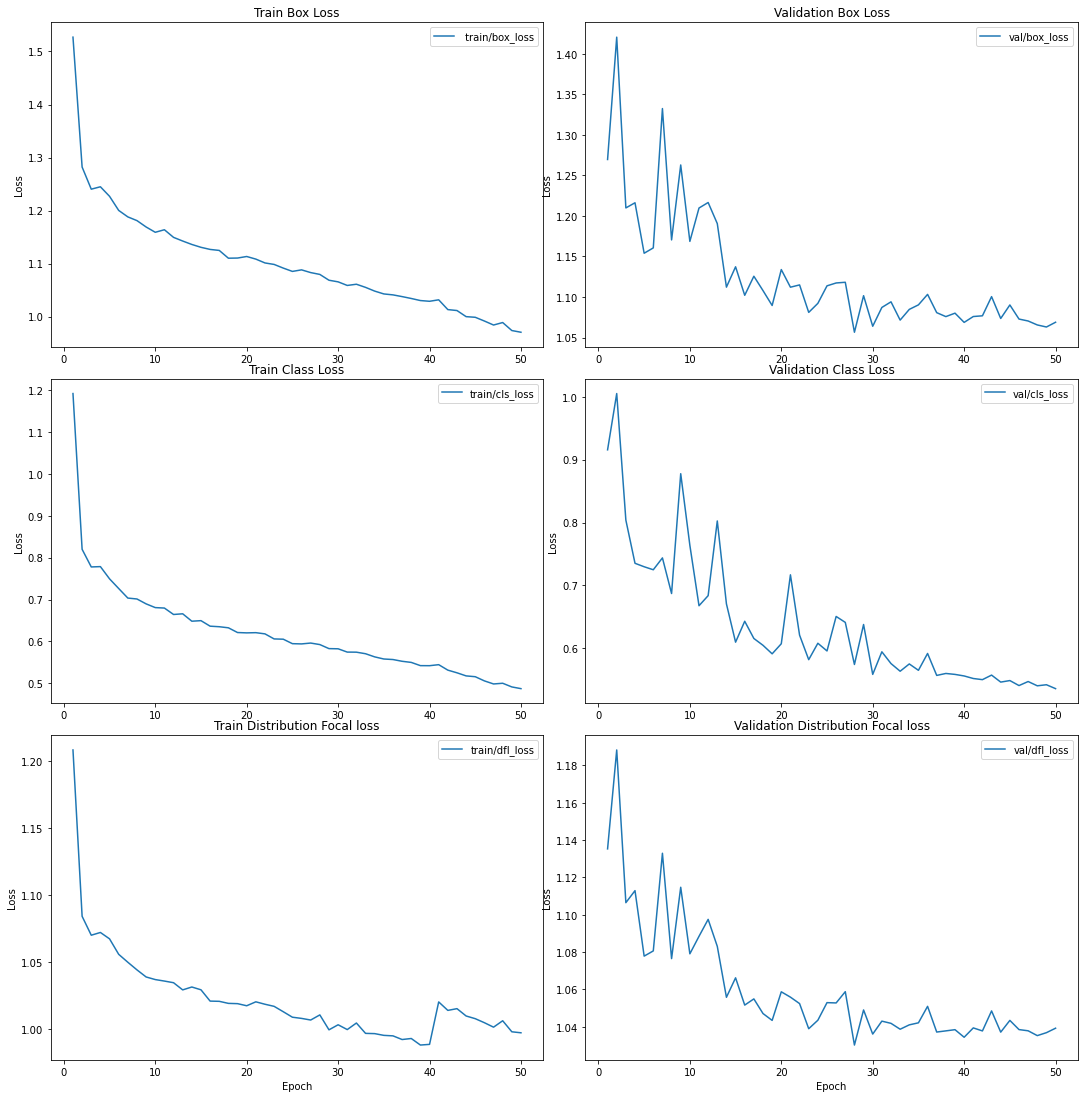

In [7]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.tight_layout()

# train/box_loss
axes[0, 0].plot(df['epoch'], df['train/box_loss'], label=' train/box_loss')
axes[0, 0].set_title('Train Box Loss')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()

# val/box_loss
axes[0, 1].plot(df['epoch'], df['val/box_loss'], label='val/box_loss')
axes[0, 1].set_title('Validation Box Loss')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()

# train/cls_loss
axes[1, 0].plot(df['epoch'], df['train/cls_loss'], label='train/cls_loss')
axes[1, 0].set_title('Train Class Loss')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].legend()

# val/cls_loss
axes[1, 1].plot(df['epoch'], df['val/cls_loss'], label='val/cls_loss')
axes[1, 1].set_title('Validation Class Loss')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].legend()

# train/dfl_loss
axes[2, 0].plot(df['epoch'], df['train/dfl_loss'], label='train/dfl_loss')
axes[2, 0].set_title('Train Distribution Focal loss')
axes[2, 0].set_xlabel('Epoch')
axes[2, 0].set_ylabel('Loss')
axes[2, 0].legend()

# val/dfl_loss
axes[2, 1].plot(df['epoch'], df['val/dfl_loss'], label='val/dfl_loss')
axes[2, 1].set_title('Validation Distribution Focal loss')
axes[2, 1].set_xlabel('Epoch')
axes[2, 1].set_ylabel('Loss')
axes[2, 1].legend()

plt.show()

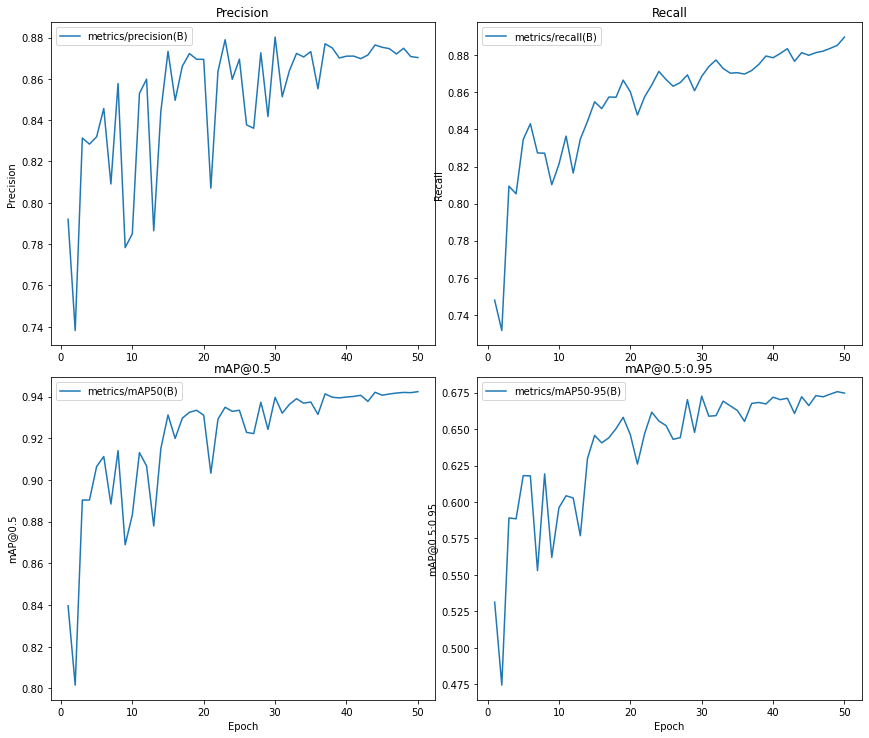

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.tight_layout()

# metrics/precision(B)
axes[0, 0].plot(df['epoch'], df['metrics/precision(B)'], label='metrics/precision(B)')
axes[0, 0].set_title('Precision')
axes[0, 0].set_ylabel('Precision')
axes[0, 0].legend()

# metrics/recall(B)
axes[0, 1].plot(df['epoch'], df['metrics/recall(B)'], label='metrics/recall(B)')
axes[0, 1].set_title('Recall')
axes[0, 1].set_ylabel('Recall')
axes[0, 1].legend()

# График для metrics/mAP50(B)
axes[1, 0].plot(df['epoch'], df['metrics/mAP50(B)'], label='metrics/mAP50(B)')
axes[1, 0].set_title('mAP@0.5')
axes[1, 0].set_ylabel('mAP@0.5')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].legend()

# metrics/mAP50-95(B)
axes[1, 1].plot(df['epoch'], df['metrics/mAP50-95(B)'], label='metrics/mAP50-95(B)')
axes[1, 1].set_title('mAP@0.5:0.95')
axes[1, 1].set_ylabel('mAP@0.5:0.95')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].legend()

plt.show()

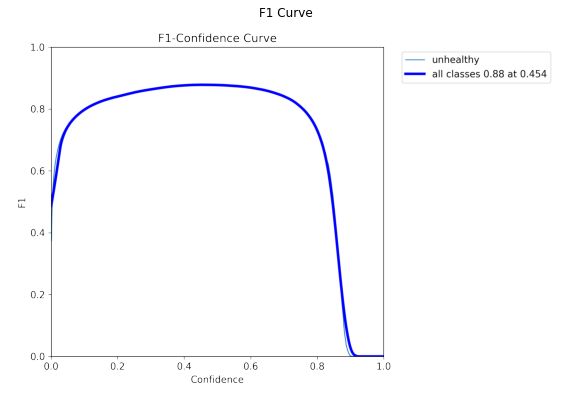

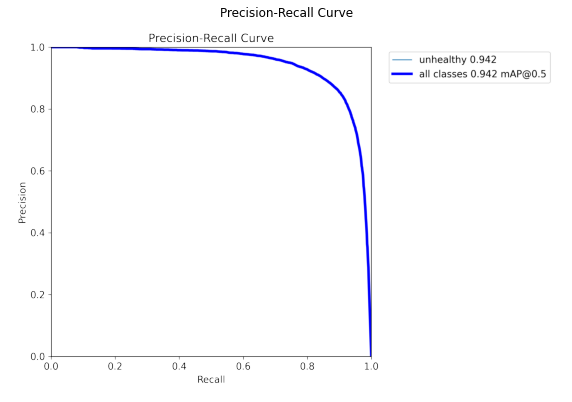

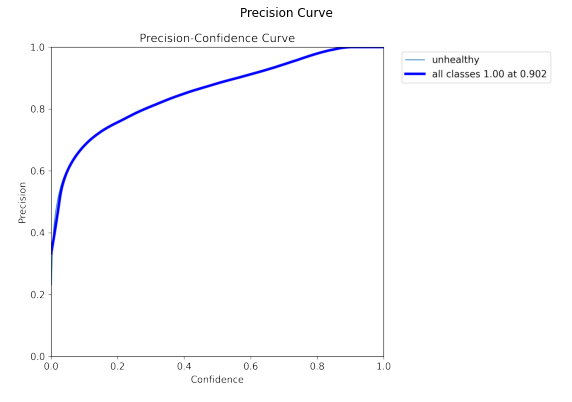

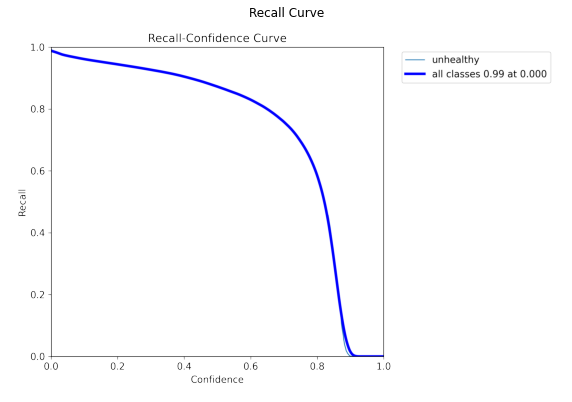

In [9]:
# F1_curve.png
f1_curve = Image.open("YOLO9m/Medium_try/F1_curve.png")
plt.figure(figsize=(10, 10))
plt.imshow(f1_curve)
plt.title("F1 Curve")
plt.axis("off")
plt.show()

# PR_curve.png
pr_curve = Image.open("YOLO9m/Medium_try/PR_curve.png")
plt.figure(figsize=(10, 10))
plt.imshow(pr_curve)
plt.title("Precision-Recall Curve")
plt.axis("off")
plt.show()

# P_curve.png
p_curve = Image.open("YOLO9m/Medium_try/P_curve.png")
plt.figure(figsize=(10, 10))
plt.imshow(p_curve)
plt.title("Precision Curve")
plt.axis("off")
plt.show()

# R_curve.png
r_curve = Image.open("YOLO9m/Medium_try/R_curve.png")
plt.figure(figsize=(10, 10))
plt.imshow(r_curve)
plt.title("Recall Curve")
plt.axis("off")
plt.show()

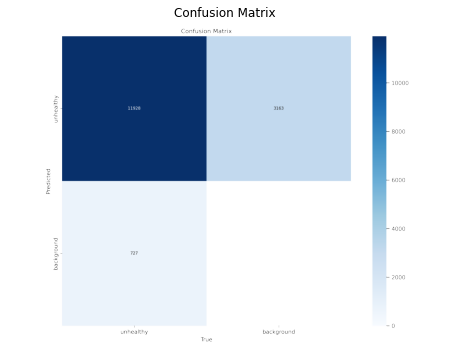

In [10]:
confusion_matrix = Image.open("YOLO9m/Medium_try/confusion_matrix.png")
plt.figure(figsize=(12, 6))
plt.imshow(confusion_matrix)
plt.title("Confusion Matrix")
plt.axis("off")
plt.show()


image 1/1 /home/user/CourseWork/datasets/Pests_and_Diseases_Tree/PDT dataset/PDT dataset/LL/YOLO_txt/test/images/images_(35)_0004.jpg: 640x640 71 unhealthys, 15.5ms
Speed: 1.1ms preprocess, 15.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


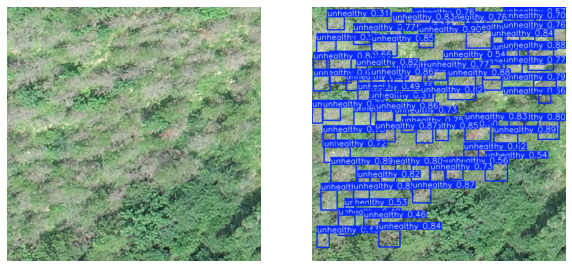

In [11]:
res = model('/home/user/CourseWork/datasets/Pests_and_Diseases_Tree/PDT dataset/PDT dataset/LL/YOLO_txt/test/images/images_(35)_0004.jpg')
detect_img = res[0].plot()
detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Отображение первого изображения
axes[0].imshow(plt.imread('/home/user/CourseWork/datasets/Pests_and_Diseases_Tree/PDT dataset/PDT dataset/LL/YOLO_txt/test/images/images_(35)_0004.jpg'))
axes[0].axis('off')

# Отображение результатов модели
axes[1].imshow(detect_img)
axes[1].axis('off')

plt.show();